# Л0: Задачи CV (Computer Vision). Создание приложения для обнаружения объектов на изображении

**CV (Computer Vision)**, или *машинное зрение*, — это область искусственного интеллекта, которая занимается разработкой алгоритмов и методов, позволяющих компьютерам "видеть" и интерпретировать изображения и видео. Основная задача компьютерного зрения — автоматическое извлечение полезной информации из визуальных данных, например, распознавание объектов, определение их местоположения или анализ сцен. Это может включать такие приложения, как автоматизация вождения, распознавание лиц и обработка медицинских изображений.

**Object detection**, или *обнаружение объектов* - это задача компьютерного зрения по обнаружению объектов (таких как люди, здания или автомобили) на изображении. Модели обнаружения объектов получают изображение в качестве входных и выходных координат ограничивающих рамок и связанных с ними меток обнаруженных объектов. Изображение может содержать несколько объектов, каждый со своей собственной ограничивающей рамкой и меткой (например, на нем может быть автомобиль и здание), и каждый объект может присутствовать в разных частях изображения (например, на изображении может быть несколько автомобилей). Эта задача обычно используется в автономном вождении для обнаружения таких объектов, как пешеходы, дорожные знаки и светофоры. Другие приложения включают подсчет объектов на изображениях, поиск по изображениям и многое другое.

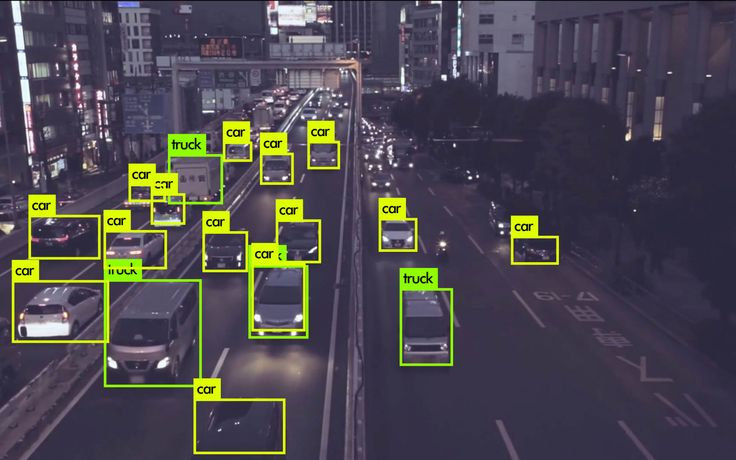

## 1/ Подготовка среды выполнения
На данной этапе вам наобходимо подготовить виртуальное окружение и установить все необходимые библиотеки.

1. Создать и активировать (или только активировать, если ранне создавали) виртуальной окружение `python`.

В терминале вводим следующие команды команды:

*создаем виртуальное окружение с помощью `python-venv`*
```
python -m venv env
```
*активируем виртуальное окружение*
```
env\Scripts\activate
```
**Примечание.** `env` - это название вашего виртуального окружения, назвать его можете как угодно.

После этого можем выбрать наш локальный интерпрететор pyhton, нажав на кнопку выше "Select kernel".

2. Устанавливаем все необходимые библиотеки

**Примечание.** Библиотеки установятся внутрь вашего виртуального окружения.

Нам понадобятся библиотеки Diffusers, Transformers, Accelerate.

```
pip install transformers
```
Также для работы вышеперечисленных бибилиотек потребуется PyTorch:
```
pip install torch
```
Библиотека Gradio для создания web-приложения.
```
pip install gradio
```
Также для работы с изображение нам потребуется библиотека PIL (Python Image Library) `Pillow`
```
pip install Pillow
```
Для работы моделей обнаружения объектов необходимо поставить библиотеку `timm`
```
pip install timm
```

## 2/ Пошаговое тестирование идеи

Прежде чем создать итоговое приложение необходимо проверить те идеи и концепции, которые вы закладываете в ИИ-приложение. Интерфейс Jupyter Notebook как нельзя кстати подходит для этой задачи, выступая в роли некой "песочницы".

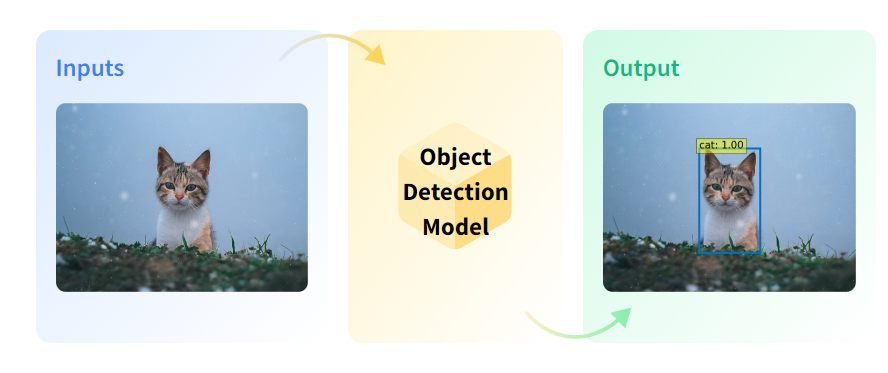

**Сперва необходмо определиться с какой предобученной моделью мы работает.** В данной лабораторной работе в качестве примера предлагается выполнить задачу описания изображения - **Object Detection** с помощью одной из предобученных CV-моделей глубокого обучения с Hugging Face https://huggingface.co/models. Сортируем модели по тегу **Object Detection**. Вывалиться список моделей для данной задачи. Для примера выберем популярную на данный момент [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50).



Первым делом импортируем все необходимые библиотеки. Нам также понадобится библиотека `Pillow` и ее модули `Image`, `ImageDraw` для работы с изображением и `requests` для загрузки изображения по URL.

In [ ]:
from transformers import pipeline
import gradio as gr
from PIL import Image, ImageDraw
import requests

Загрузим выбранную модель:

In [ ]:
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Изображение загружаем по ссылке с поомщью библиотеки запросов `requests`.
Скопируем URL на изображение.

In [ ]:
image_url = "https://www.zdnet.com/a/img/resize/6e3ba697e7c5d4901e8402e3f235c08b97f5f207/2015/11/09/99b78749-8986-4597-bd7b-f57f7ffd5084/volvo-driverless-cars-road.jpg?auto=webp&fit=crop&height=675&width=1200"

Загрузим изображение и обернем его в формат библиотеки PIL:

In [ ]:
req = requests.get(image_url, stream=True)
image = Image.open(req.raw)

Выведете изображение на экран

In [ ]:
image

Запустим модель `facebook/detr-resnet-50` обнаружения объектов

In [ ]:
results = pipe(image)

Чтобы понимать структуру данных ответа выведем результат работы:

In [ ]:
results

Мы получаем массив, где каждый элемент это обнаруженный объект. У каждого обнаруженного объекта есть три поля:
- `score` - вероятность обнаружения объекта
- `box` - координаты объекта (координаты прямоугольной области, в которой находится объект)
- `label` - название обнаруженного объекта

Теперь необходимо визуализировать результаты. На исходном изображение нанести прямоугольные области и подписать объекты. Для этого воспользуемся библиотекой PIL ImageDraw объект на основе нашего изображения:

In [ ]:
imdraw = ImageDraw.Draw(image)

Это позволит нам отрисовывать на изображении различные объекты

Создадим цикл по всем элементам ответа нашей модели. Давайте учитывать только те объекты, вероятность обнаружения которых высока
```python
for res in results:
    if res['score'] > 0.9:
        ...
```

Для каждого такого объекта вытащим в отдельный массив `[xmin, ymin, xmax, ymax]` координаты прямоугольной области и нанесем его на изображение:
```python
box = [res['box']['xmin'], res['box']['ymin'], res['box']['xmax'], res['box']['ymax']]
```

Затем нанесем прямоугольники на изображение. Сделаем цвет контура красным и толщину равную 3:
```python
imdraw.rectangle(box, outline='red', width=3)
```

В дополнении отобразим название обнаруженного объекта в верхнем левом углу прямоугольной области
```python
imdraw.text(xy=[box[0], box[1]], text=res['label'])
```

В итоге должны получить вот такой код:

In [ ]:
for res in results:
    if res['score'] > 0.9:
        box = [res['box']['xmin'], res['box']['ymin'], res['box']['xmax'], res['box']['ymax']]
        imdraw.rectangle(box, outline='red', width=3)
        imdraw.text(xy=[box[0], box[1]], text=res['label'])

Выведем на экран получившиеся изображение с обнаруженными объектами:

In [ ]:
image

## 3/ Создание WEB-интерфейса с помощью `Gradio`
Создайте приложение Gradio, в котором в качестве входного блока будет текстовой блок, куда вносится ссылка на изображении. На выходе должны получить:
- исходное изображение
- изображение с обнаруженными объектами

В качестве тестовых изображений предлагается применить шедевры мировой живописи с несколькими однотипными объектами (людей, животных и т.д.), написанных в разных стилях. Например:
- *Утро в сосновом лесу, Иван Иванович Шишкин, 1889г.*
- *Явление Христа народу, Иванов Александр Андреевич (1806–1858)*
- *Весна, Сандро Боттичелли, около 1482г.*
- *Ночной дозор, Рембрандт Харменс ван Рейн, 1642г*
- *Прогулка около Аржантёя, Клод Моне, 1875г*
- *Едоки картофеля, Винсент Ван Гог, 1885г*

Таким образом мы получим полноценное описание изборажения как текстовое, так и визуальное.

## Форма отчетности
В качестве отчета по лабораторной работе вам необходимо предоставить:
1. Файл с кодом вашего приложения (Python Script или Jupyter Nonebook)
2. Скриншот работы графического web-интерфейса вашего приложения